In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [2]:
def read_pdb_coord(input_pdb):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y,bz) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    
                    # Append the coordinates to the lists
                    x_coord.append(x)
                    y_coord.append(y)
                    z_coord.append(z)
    return (x_coord, y_coord, z_coord)

def distance_between_bilayers(input_pdb_coord):

    data_whole = read_pdb_coord(input_pdb_coord)
    data = data_whole[2]
    data_mean = sum(data)/len(data)

    #separate the coordinates into two set of coordinates representing each individual bilayer
    bilayer_1 = []
    bilayer_2 = []
    for i in data:
        if i < data_mean:
            bilayer_1.append(i)
        else:
            bilayer_2.append(i)

    #compute average position along the z axis of each bilayer
    bilayer_1_mean = sum(bilayer_1)/len(bilayer_1)
    bilayer_2_mean = sum(bilayer_2)/len(bilayer_2)
    distance = bilayer_2_mean - bilayer_1_mean
    return distance


def read_pdb_coord_window(input_pdb, z_height, window_size=10):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y,bz) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    if z > z_height-(window_size/2) and z < z_height+(window_size/2):
                        if atom.name in ["N", "CA", "C1"]:
                            # Append the coordinates to the lists
                            x_coord.append(x)
                            y_coord.append(y)
                            z_coord.append(z)
    return (x_coord, y_coord, z_coord)

In [16]:
x, y, z = read_pdb_coord("/home/deider/memoire/experiences/project_ppm/thomas_barrel_cleaned.pdb")

In [4]:
x, y, z = read_pdb_coord("/home/deider/memoire/experiences/projet_modulable_bilayer/inputs/1bxw_chainA.pdb")

In [40]:
x2, y2, z2 = read_pdb_coord_window("/home/deider/memoire/experiences/project_ppm/thomas_barrel_cleaned.pdb", 66.68, window_size=10)

In [6]:
x2, y2, z2 = read_pdb_coord_window("/home/deider/memoire/experiences/projet_modulable_bilayer/inputs/1bxw_chainA.pdb", 41, window_size=10)

In [7]:
# These are the coordinates of the ppm layer to be able to find the level along the z axis at which these are situated
#x, y, z = read_pdb_coord("/home/deider/memoire/experiences/project_ppm/ppm_without_barrel.pdb")

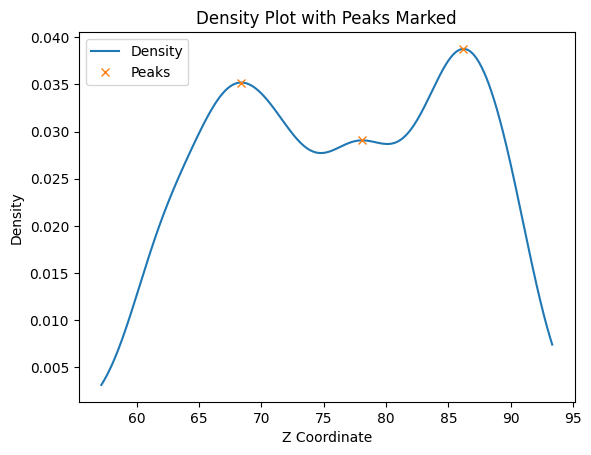

Peaks are located at: [68.38613  78.086975 86.19515 ]
Distance between peaks: 9.700844
Middle point: 73.23656


In [36]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(z)
x_values = np.linspace(min(z), max(z), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("Z Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

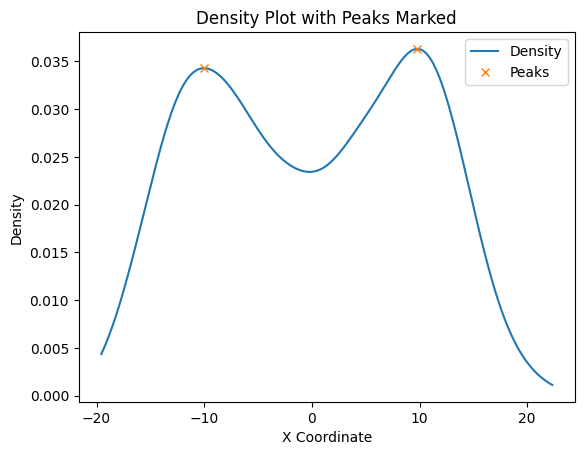

Peaks x axis are located at: [-10.041677   9.791653]
Distance between peaks: 19.83333
Middle point: -0.1250124


In [37]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(x)
x_values = np.linspace(min(x), max(x), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks x axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

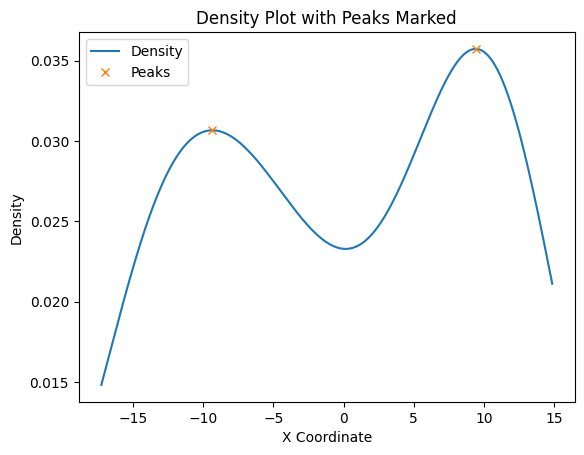

Peaks x axis are located at: [-9.350891   9.4049015]
Distance between peaks: 18.755793
Middle point: 0.027005196


In [41]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(x2)
x_values = np.linspace(min(x2), max(x2), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks x axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

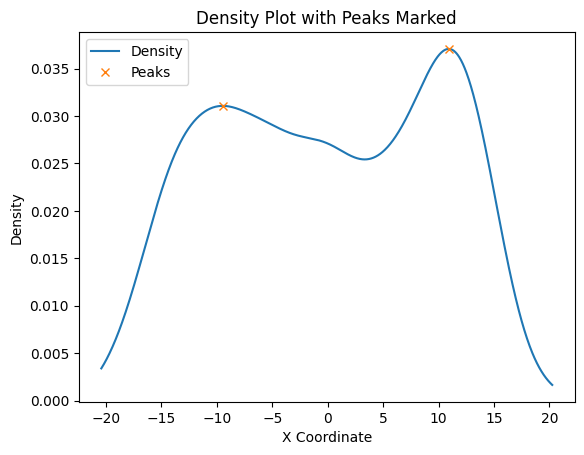

Peaks y axis are located at: [-9.464819 10.931246]
Distance between peaks: 20.396065
Middle point: 0.7332134


In [29]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(y)
x_values = np.linspace(min(y), max(y), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks y axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

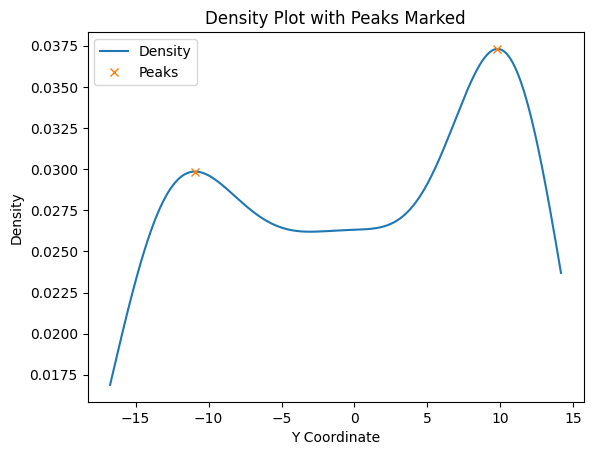

Peaks y axis are located at: [-10.931491   9.786869]
Distance between peaks: 20.71836
Middle point: -0.5723109


In [42]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(y2)
x_values = np.linspace(min(y2), max(y2), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("Y Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks y axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

## Here I will explore hoz to reliably change the alanines with unknown residues

In [31]:
def find_start_line_of_last_chain(pdb_file):
    chain_order = []
    atom_lines = []

    with open(pdb_file, 'r') as f:
        for idx, line in enumerate(f, 1):
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21]
                atom_lines.append((idx, chain_id))
                if not chain_order or chain_id != chain_order[-1]:
                    chain_order.append(chain_id)


    last_chain = chain_order[-1]

    for line_num, chain_id in atom_lines:
        if chain_id == last_chain:
            return line_num

    return None


In [32]:
def replace_ala_with_unk(input_pdb, output_pdb):
    start_line = find_start_line_of_last_chain(input_pdb)

    with open(input_pdb, 'r') as file:
        lines = file.readlines()

    for i in range(start_line - 1, len(lines)):
        lines[i] = lines[i].replace(" ALA ", " UNK ")

    with open(output_pdb, 'w') as file:
        file.writelines(lines)


In [33]:
replace_ala_with_unk("/home/deider/memoire/experiences/thomas_barrel_plus_VR.pdb", "/home/deider/memoire/experiences/delete.pdb")